In [1]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

In [2]:
def simulate(choices, probs, alpha, time_steps=100, num_trials=1000):
    def outcome():
        return rnd.choice(choices, size=num_trials, p=probs)
    wealth = np.ones(num_trials)
    for t in range(time_steps):
        wealth = wealth + alpha * wealth * outcome()
    theoretical_wealth = np.exp(time_steps * np.sum(np.array(probs) * np.log(1 + alpha * np.array(choices))))
    return wealth, theoretical_wealth

def make_plot(wealth, theoretical_wealth, bins=np.geomspace(1e-4, 1e6, num=25)):
    print('Median payoff: %.2e (Theory = %.2e)' % (np.median(wealth), theoretical_wealth))
    plt.hist(wealth, bins=bins)
    plt.axvline(x = theoretical_wealth, color = 'r', label = 'Theory')
    plt.semilogx()
    plt.show()

Median payoff: 6.31e-15 (Theory = 6.31e-15)


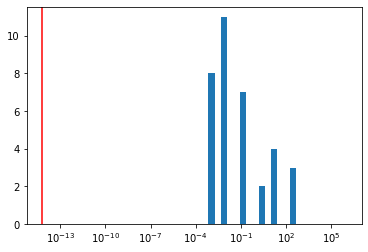

In [8]:
choices = [-1, 2]
probs = [0.5, 0.5]
wealth, theoretical_wealth = simulate(choices, probs, 0.8)
make_plot(wealth, theoretical_wealth)

Median payoff: 2.34e+02 (Theory = 1.98e+02)


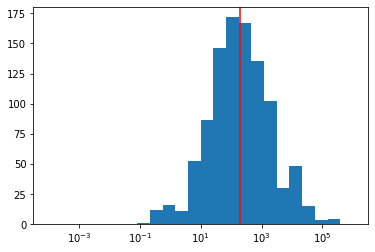

In [10]:
choices = [-1, 1]
probs = [1.0/3, 2.0/3]
wealth, theoretical_wealth = simulate(choices, probs, 0.25)
make_plot(wealth, theoretical_wealth)

Median payoff: 2.86e+01 (Theory = 3.66e+01)


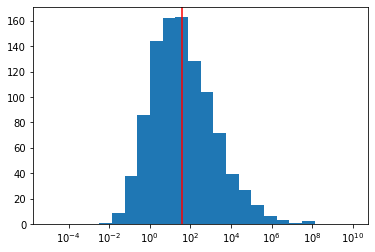

In [271]:
choices = 2   ** np.array([-np.inf, 0, 1, 2, 3, 4, 5, 6, 7]) - 1
probs   = 0.5 ** np.array([1, 2, 3, 4, 5, 6, 7, 8, 8])
wealth, theoretical_wealth = simulate(choices, probs, 0.12)
make_plot(wealth, theoretical_wealth, bins=np.geomspace(1e-5, 1e10, num=25))